In [2]:
import pandas as pd
import re

# Read the data file
file_path = "output.txt"
data = []

with open(file_path, "r") as file:
    for line in file:
        match = re.search(r"Generation:\s+(\d+)\s+Average fitness:\s+([\d.e+-]+)\s+Best fitness:\s+([\d.e+-]+)", line)
        if match:
            generation = int(match.group(1))
            avg_fitness = float(match.group(2))
            best_fitness = float(match.group(3))
            data.append([generation, avg_fitness, best_fitness])

# Create a DataFrame
df = pd.DataFrame(data, columns=["Generation", "Average Fitness", "Best Fitness"])

# Display the DataFrame
df.head()  # Shows the first few rows


,Generation,Average Fitness,Best Fitness
0,1,0.001106,0.015246
1,2,0.001369,0.021240
2,3,0.000423,0.005632
3,4,0.000324,0.005720
4,5,0.001165,0.013275


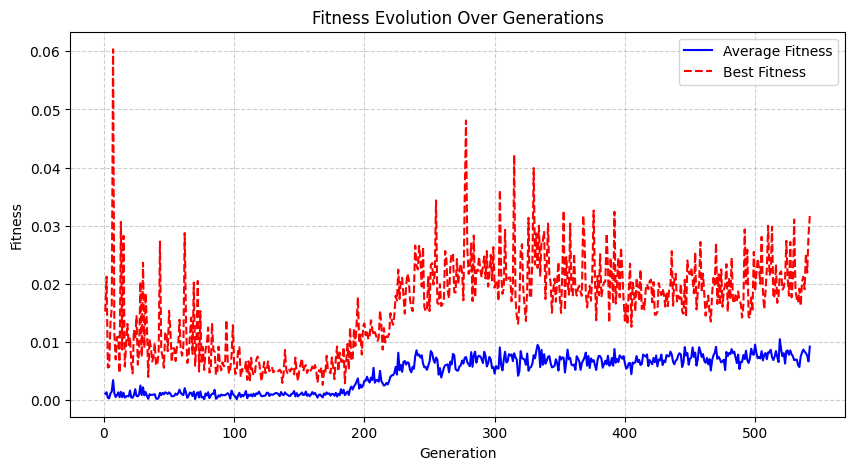

In [3]:
import matplotlib.pyplot as plt

# Plot fitness over generations
plt.figure(figsize=(10, 5))

# Plot both Average and Best fitness
plt.plot(df["Generation"], df["Average Fitness"], label="Average Fitness", linestyle="-", color="blue")
plt.plot(df["Generation"], df["Best Fitness"], label="Best Fitness", linestyle="--", color="red")

# Labels and Title
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Evolution Over Generations")
plt.legend()

# Show grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()
